# First Midterm, Answers, EPIB-463, Fall 2022

### Question 1

Load the data file in this assignment folder as a pandas DataFrame named `df`. You can do this the standard way, even though it is not a csv file. The delimiter between columns is the string `'\s+'`. Read the official Pandas documentation on the function you want to use to load this DataFrame and figure out how to incorporate this delimiter when calling the function.

In [1]:
# Answer 1: The hard part about this question was reading the directions and looking at the pandas documentation.
import pandas as pd
df = pd.read_csv('Admissions.dat', sep='\s+')
df.head()

,department,gender,yes,no
0,anthropol,0,21,41
1,anthropol,1,32,81
2,astronomy,0,3,8
3,astronomy,1,6,0
4,chemistry,0,34,110


### Question 2

From the table, how many departments are there? (You can obviously count the number of departments in your head. This question is not asking you to do that, it's asking you to write code.)

In [2]:
# Answer 2: Option 1 nunique is a dataframe method, you may not have known this existed
num_unique_departments = df.department.nunique()
print("There are", num_unique_departments, "departments.")

There are 23 departments.


In [3]:
# Answer 2: Option 2, unique is another dataframe method
unique_departments = df.department.unique()
num_unique_departments = len(unique_departments)
print("There are", num_unique_departments, "departments.")

There are 23 departments.


In [4]:
# Answer 2: Option 3, here is a way we have practiced that involves a for loop and a list that conditionally grows
unique_departments = []
for department in df.department:
    if department not in unique_departments:
        unique_departments.append(department)

num_unique_departments = len(unique_departments)
print("There are", num_unique_departments, "departments.")

There are 23 departments.


In [5]:
# Answer 2: Option 4, here it is with Counter.
import collections
counter = collections.Counter(df.department)
num_unique_departments = len(counter)
print("There are", num_unique_departments, "departments.")

There are 23 departments.


### Question 3

Let's simplify this dataframe. Create a new dataframe named `df_simplified` that has one row for each department, and ignores gender. 
  - The columns in `df_simplified` should be just [`yes`, `no`].
  - The index of `df_simplified` should be the department names.

In [6]:
# Answer 3: Option 1, aggregate the yes and no's by summing them up.
df_simplified = df.groupby('department')[['yes', 'no']].sum()
df_simplified.head()

,yes,no
department,,
anthropol,53,122
astronomy,9,8
chemistry,46,153
classics,7,1
communicat,57,159


In [7]:
# Answer 3: Option 2 while we do not take the sum, we just use data from one gender.
rows_for_gender_0 = []
for idx, row in df.iterrows():
    if idx % 2 == 0:
        rows_for_gender_0.append(row)
df_simplified = pd.DataFrame(rows_for_gender_0, columns=df.columns)
df_simplified.index = df_simplified.pop('department')
df_simplified = df_simplified.drop('gender', axis=1)
df_simplified.head()

,yes,no
department,,
anthropol,21,41
astronomy,3,8
chemistry,34,110
classics,4,0
communicat,5,10


### Question 4

Create a new column in `df_simplified` indicating the acceptance rate. Name the column `acceptance_rate`. 
 - For example, if you have 10 yes's and 40 no's, then the acceptance rate would be 0.2 because 50 people applied and 10 got in and 10/50 is 0.2.

In [8]:
# Answer 4 This exact scenario was covered in the first section of the recent DataCamp course on data manipulation.
df_simplified['acceptance_rate'] = df_simplified['yes'] / (df_simplified['yes'] + df_simplified['no'])
df_simplified.head()

,yes,no,acceptance_rate
department,,,
anthropol,21,41,0.338710
astronomy,3,8,0.272727
chemistry,34,110,0.236111
classics,4,0,1.000000
communicat,5,10,0.333333


### Question 5

Using `df_simplified`, graph the acceptance rates for each department in a bar chart.

<AxesSubplot:xlabel='department'>

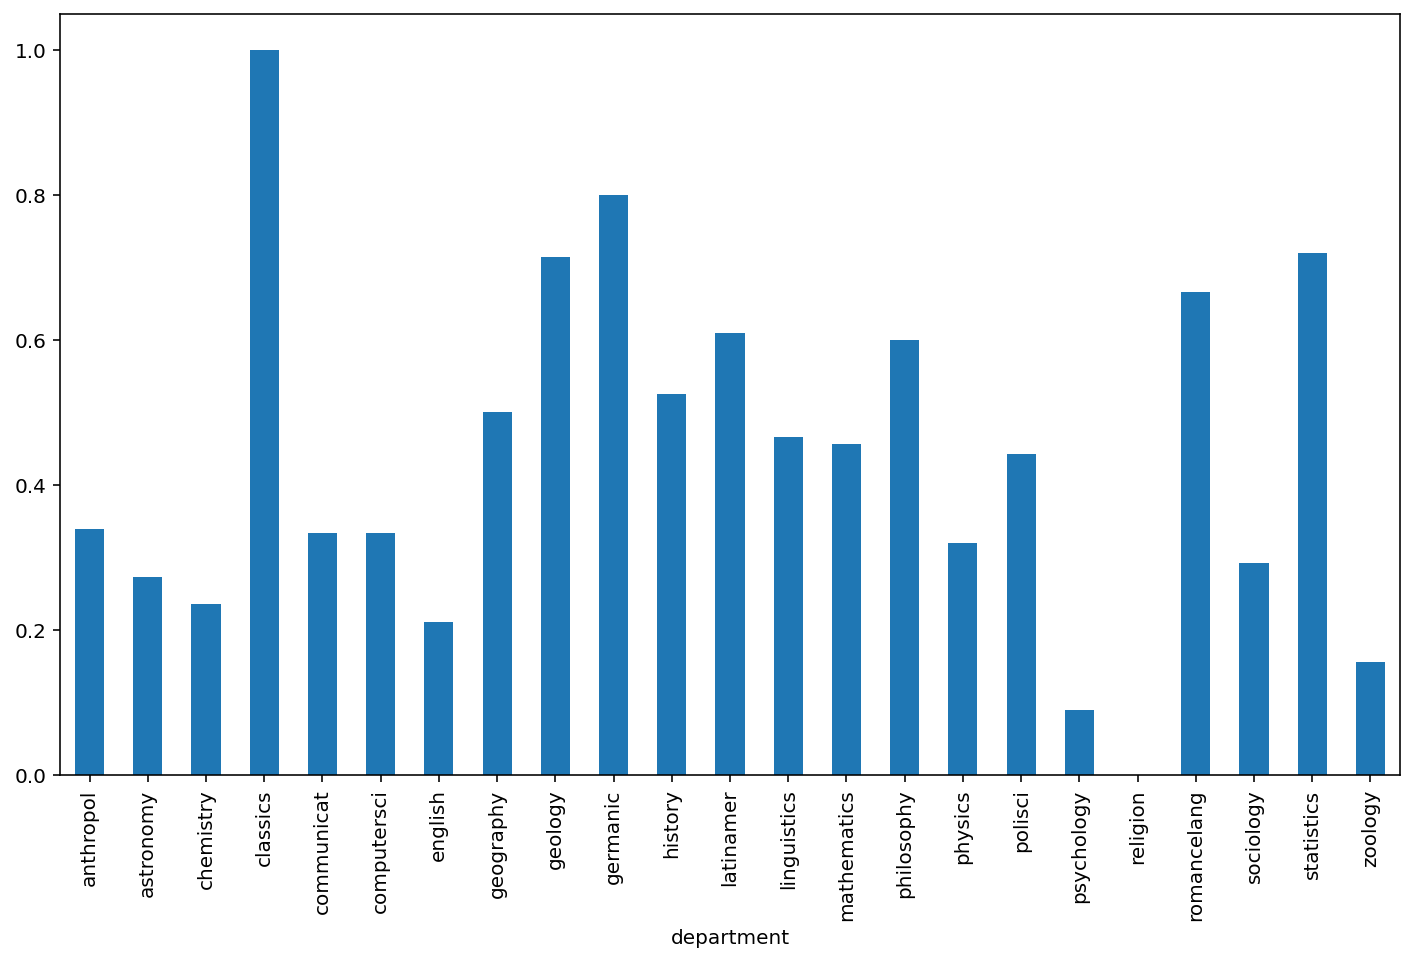

In [9]:
# Answer 5 Multiple possibilities would be accepted here, the main idea is to visualize the data
df_simplified.acceptance_rate.plot(kind='bar')

### Question 6

Suppose you had a 52 card deck. The deck has 13 different card numbers and 4 different suits. Create a list of tuples, where each tuple is one card. Name the list `cards`.
 - I don't care what you call the 13 cards. You can use real names like "two" and "Ace", or you can use the numbers zero through 13.
 - I don't care what you call the suits.
 - The important thing is that you create a list named `cards`, and it has tuples that you can distinguish from one another.

In [10]:
# Answer 6: Option 1 Using itertools
import itertools

card_numbers = range(1, 14)
suits = ['hearts', 'diamonds', 'clubs', 'spades']
cards = list(itertools.product(card_numbers, suits))
print(cards)

[(1, 'hearts'), (1, 'diamonds'), (1, 'clubs'), (1, 'spades'), (2, 'hearts'), (2, 'diamonds'), (2, 'clubs'), (2, 'spades'), (3, 'hearts'), (3, 'diamonds'), (3, 'clubs'), (3, 'spades'), (4, 'hearts'), (4, 'diamonds'), (4, 'clubs'), (4, 'spades'), (5, 'hearts'), (5, 'diamonds'), (5, 'clubs'), (5, 'spades'), (6, 'hearts'), (6, 'diamonds'), (6, 'clubs'), (6, 'spades'), (7, 'hearts'), (7, 'diamonds'), (7, 'clubs'), (7, 'spades'), (8, 'hearts'), (8, 'diamonds'), (8, 'clubs'), (8, 'spades'), (9, 'hearts'), (9, 'diamonds'), (9, 'clubs'), (9, 'spades'), (10, 'hearts'), (10, 'diamonds'), (10, 'clubs'), (10, 'spades'), (11, 'hearts'), (11, 'diamonds'), (11, 'clubs'), (11, 'spades'), (12, 'hearts'), (12, 'diamonds'), (12, 'clubs'), (12, 'spades'), (13, 'hearts'), (13, 'diamonds'), (13, 'clubs'), (13, 'spades')]


In [11]:
# Answer 6: Option 2 Using a nested for loop
card_numbers = range(1, 14)
suits = ['hearts', 'diamonds', 'clubs', 'spades']
cards = []
for num in card_numbers:
    for suit in suits:
        card = num, suit # or card = (num, suit)
        cards.append(card)
print(cards)

[(1, 'hearts'), (1, 'diamonds'), (1, 'clubs'), (1, 'spades'), (2, 'hearts'), (2, 'diamonds'), (2, 'clubs'), (2, 'spades'), (3, 'hearts'), (3, 'diamonds'), (3, 'clubs'), (3, 'spades'), (4, 'hearts'), (4, 'diamonds'), (4, 'clubs'), (4, 'spades'), (5, 'hearts'), (5, 'diamonds'), (5, 'clubs'), (5, 'spades'), (6, 'hearts'), (6, 'diamonds'), (6, 'clubs'), (6, 'spades'), (7, 'hearts'), (7, 'diamonds'), (7, 'clubs'), (7, 'spades'), (8, 'hearts'), (8, 'diamonds'), (8, 'clubs'), (8, 'spades'), (9, 'hearts'), (9, 'diamonds'), (9, 'clubs'), (9, 'spades'), (10, 'hearts'), (10, 'diamonds'), (10, 'clubs'), (10, 'spades'), (11, 'hearts'), (11, 'diamonds'), (11, 'clubs'), (11, 'spades'), (12, 'hearts'), (12, 'diamonds'), (12, 'clubs'), (12, 'spades'), (13, 'hearts'), (13, 'diamonds'), (13, 'clubs'), (13, 'spades')]


### Question 7

Create a list named `triplets` of all the ways you can select 3 cards. How many triplets are there?

In [12]:
# Answer 7 Option 1 Here we use combinations. And while this is possible with some 
# for loops, that would be unreasonable for me to expect you to write that during the midterm.
import itertools
triplets = list(itertools.combinations(cards, r=3))
num_triplets = len(triplets)
print(*triplets[:5], sep='\n')
print("There are", num_triplets, "triplets.")

((1, 'hearts'), (1, 'diamonds'), (1, 'clubs'))
((1, 'hearts'), (1, 'diamonds'), (1, 'spades'))
((1, 'hearts'), (1, 'diamonds'), (2, 'hearts'))
((1, 'hearts'), (1, 'diamonds'), (2, 'diamonds'))
((1, 'hearts'), (1, 'diamonds'), (2, 'clubs'))
There are 22100 triplets.


### Question 8

Pretend that you have a sample space made up of all the triplets and they are all equally likely. Come up with an example of a random variable using this sample space.

A random variable is a function mapping from the sample space of triplets (there are 22,100 of them), to the set of continuous numbers.

The random variable I am making up works like this:
 1. If there are exactly two diamonds and one heart in a triplet, it's worth 10.
 2. If there is at least 1 card with number 1, it's worth 1.
 3. Anything else is worth 0.
 4. If conditions 1 and 2 are satisfied, it's worth -1000.

## Bonus

Yes, the above is indeed a function and I intentionally made it sort of complicated but that is not necessary at all for this problem. What's important is that the computation of the function's output is unambiguous. Below, I've written a function named `score` that takes one triplet as an argument and returns the value provided by the random variable.
 - This function is your random variable.

In [16]:
def score(triplet):
    num_diamonds, num_hearts = 0, 0
    is_ace = False
    for num, suit in triplet:
        if suit == 'diamonds':
            num_diamonds += 1
        elif suit == 'hearts':
            num_hearts += 1
        if num == 1:
            is_ace = True
    cond_2 = is_ace
    cond_1 = True if num_diamonds == 2 and num_hearts == 1 else False
    if cond_1 and not cond_2:
        return 10
    if cond_2 and not cond_1:
        return 1
    if cond_1 and cond_2:
        return -1000
    else:
        return 0

In [17]:
score(((1, 'hearts'), (1, 'diamonds'), (2, 'diamonds')))

-1000

In [18]:
score(((1, 'diamonds'), (1, 'diamonds'), (2, 'diamonds')))

1

In [19]:
score(((10, 'diamonds'), (4, 'diamonds'), (2, 'clubs')))

0

In [20]:
score(((7, 'hearts'), (9, 'diamonds'), (2, 'diamonds')))

10